# CS4168 Project
## Spotify Data Mining
* Cathal Crowe - 21320128
* Robert Flanagan - 21311625
* Mohd Humayun - 21332207
* Steven Lavelle - 21316945
* Oluwadara Fatoki - 21234639

## Importing Modules and Dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import (ColumnTransformer, TransformedTargetRegressor)
from sklearn.base import (BaseEstimator, TransformerMixin)
from sklearn.preprocessing import (StandardScaler, RobustScaler, OneHotEncoder, FunctionTransformer)
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import set_config, manifold, cluster, preprocessing
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.pipeline import Pipeline
from sklearn.cluster  import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
%matplotlib inline
# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm

# regression algorithms
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingClassifier
from sklearn.linear_model import LinearRegression

from sklearn.pipeline      import Pipeline
from sklearn.compose       import ColumnTransformer
from sklearn.preprocessing import (
    FunctionTransformer,
    StandardScaler,
    OneHotEncoder
)

from kneed import KneeLocator
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score,
    mean_absolute_error
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import manifold, cluster, metrics, neighbors

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn import set_config
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("tracks.csv")

## Exploratory Data Analysis (EDA)

In [189]:
df.head(5)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,85,202093,True,0.658,0.671,2,-12.210,1,0.0363,0.09330,0.000927,0.1150,0.166,100.966,4,club
1,49,215973,False,0.627,0.505,6,-12.659,1,0.0549,0.19700,0.014900,0.0583,0.146,100.005,4,club
2,65,188160,False,0.807,0.835,9,-6.849,0,0.0631,0.00148,0.527000,0.2330,0.349,124.979,4,club
3,59,233965,False,0.748,0.549,6,-5.447,0,0.0650,0.00268,0.792000,0.1960,0.197,101.033,4,club
4,55,187173,False,0.683,0.869,0,-4.828,1,0.0515,0.00088,0.836000,0.2060,0.219,123.983,4,club


In [190]:
df.tail(5)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1495,23,352371,False,0.273,0.122,0,-22.173,0,0.0575,0.960,0.003330,0.0635,0.0731,117.718,4,opera
1496,22,204310,False,0.457,0.498,6,-8.387,1,0.0368,0.766,0.000002,0.2890,0.2020,116.255,4,opera
1497,23,225506,False,0.241,0.207,1,-16.353,1,0.0374,0.982,0.002260,0.1140,0.0735,86.885,1,opera
1498,23,148600,False,0.280,0.208,5,-20.158,1,0.0521,0.941,0.000200,0.4100,0.2410,90.477,4,opera
1499,23,257800,False,0.244,0.205,3,-15.596,1,0.0367,0.984,0.329000,0.0788,0.0750,71.370,4,opera


 data set contains 1500 rows of data with a mix of catgorical and numerical data, with a majority being numerical

In [191]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,28.554000,209746.921333,0.541069,0.594378,5.043333,-8.312037,0.654000,0.077477,0.347930,0.166602,0.194847,0.378548,116.924497,3.880000
std,24.038587,67423.126723,0.206632,0.261282,3.522744,5.552970,0.475852,0.080272,0.376654,0.310986,0.167316,0.246329,28.885636,0.466632
min,0.000000,40266.000000,0.060100,0.005680,0.000000,-39.219000,0.000000,0.024400,0.000003,0.000000,0.028200,0.024700,51.096000,0.000000
25%,1.000000,173061.000000,0.381000,0.397750,2.000000,-9.887750,0.000000,0.036300,0.024600,0.000000,0.096900,0.167000,95.244750,4.000000
50%,25.000000,203506.000000,0.572500,0.647500,5.000000,-6.458500,1.000000,0.046400,0.143000,0.000117,0.127000,0.338500,115.082000,4.000000
75%,47.000000,238861.500000,0.695000,0.813000,8.000000,-4.723500,1.000000,0.076000,0.756000,0.090775,0.224250,0.575500,132.016500,4.000000
max,93.000000,879905.000000,0.957000,0.996000,11.000000,0.366000,1.000000,0.859000,0.996000,0.983000,0.987000,0.965000,213.928000,5.000000


 no missing values within the dataset

<Axes: >

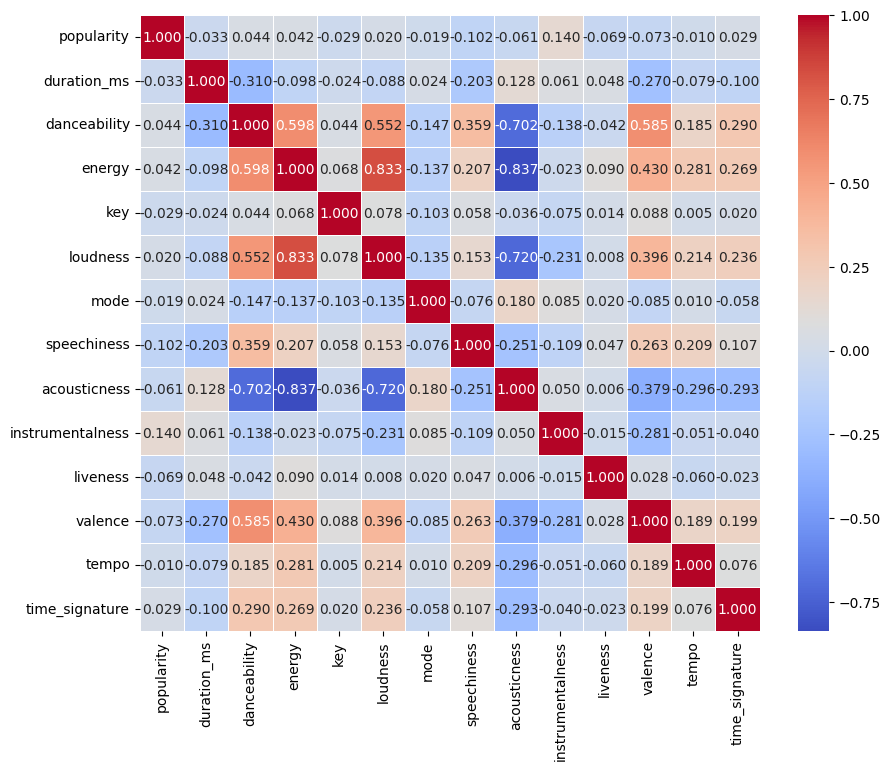

In [192]:
numeric_df = df.select_dtypes(include=["number"])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)

there is a healthy mix of correlation between the vlaues, with some of the highest correlation being between `energy` and `danceability`, `energy` and `loudness`, `energy` and `valence` and `danceability` and `loudness`

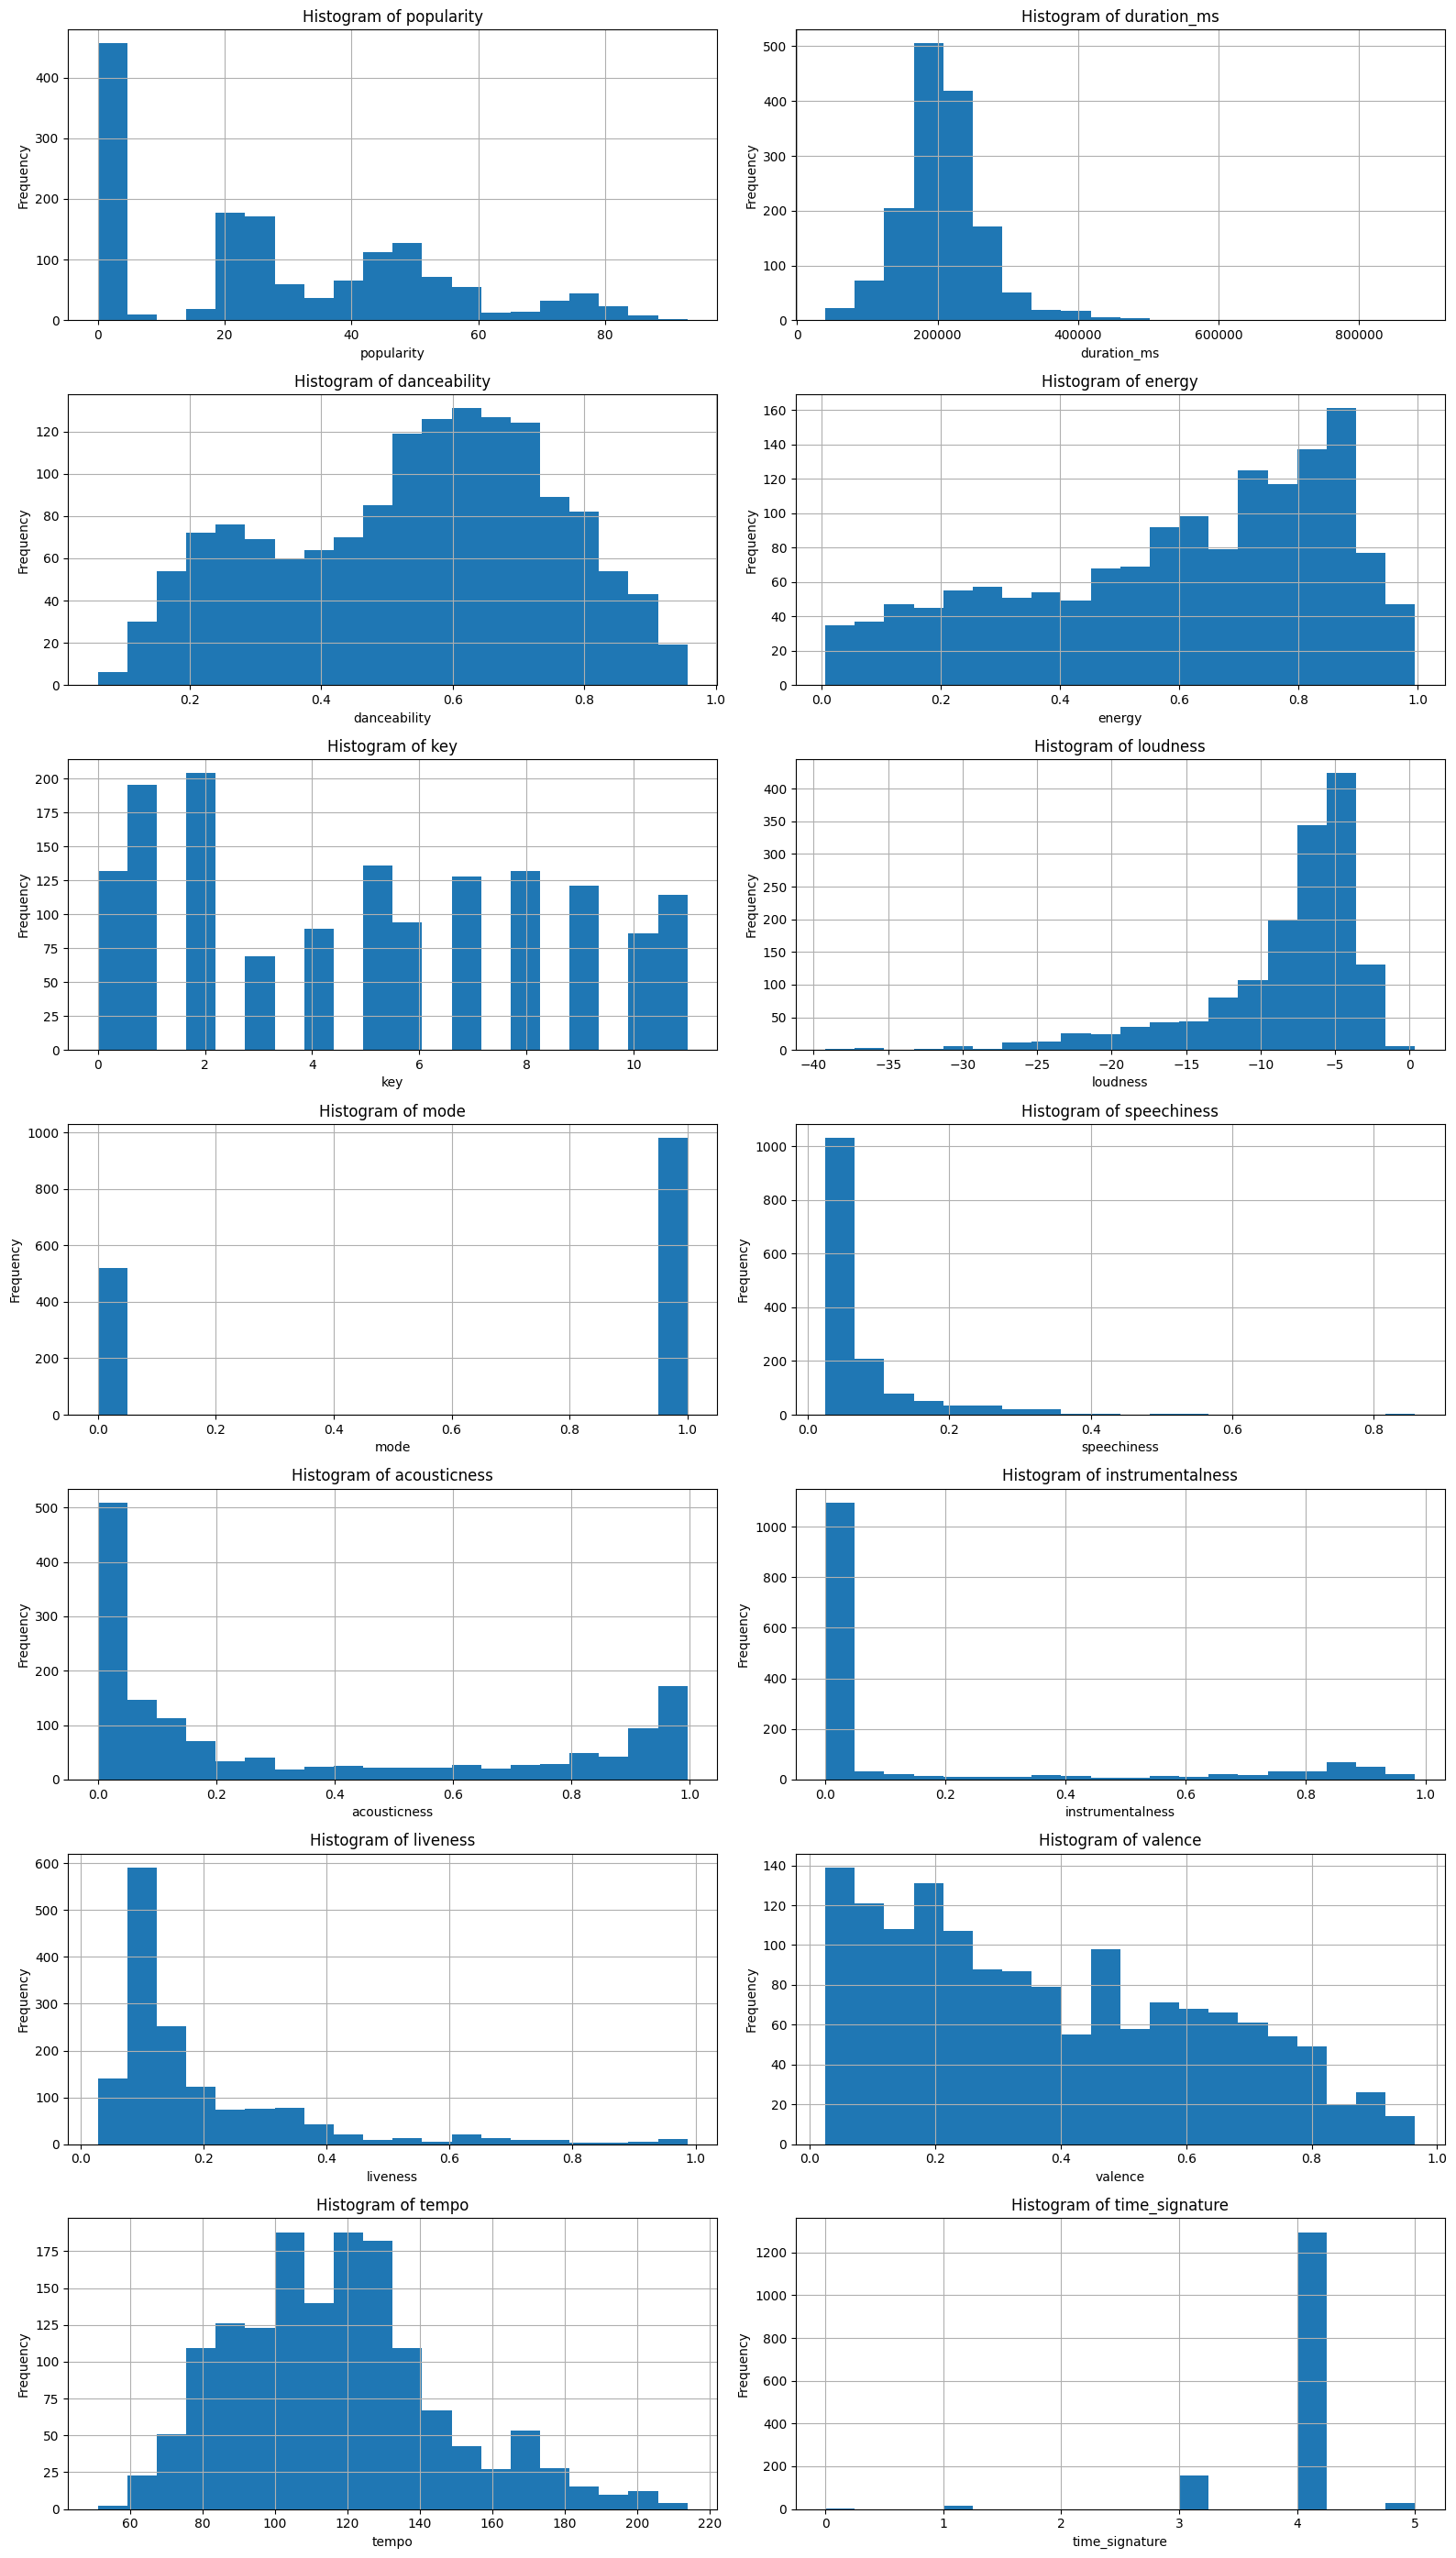

In [193]:

# List of features to plot
features = [
    "popularity", "duration_ms", "danceability", "energy", "key", "loudness",
    "mode", "speechiness", "acousticness", "instrumentalness", "liveness",
    "valence", "tempo", "time_signature"
]

# Calculate the number of rows needed for 2 columns per row.
num_features = len(features)
num_rows = math.ceil(num_features / 2)

# Create the figure with appropriate size.
fig = plt.figure(figsize=(16, 4 * num_rows))

# Loop through each feature to create a subplot for its histogram.
for i, feature in enumerate(features):
    ax = fig.add_subplot(num_rows, 2, i + 1)
    ax.set_title(f"Histogram of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    df[feature].hist(bins=20, ax=ax)

plt.tight_layout()
plt.show()

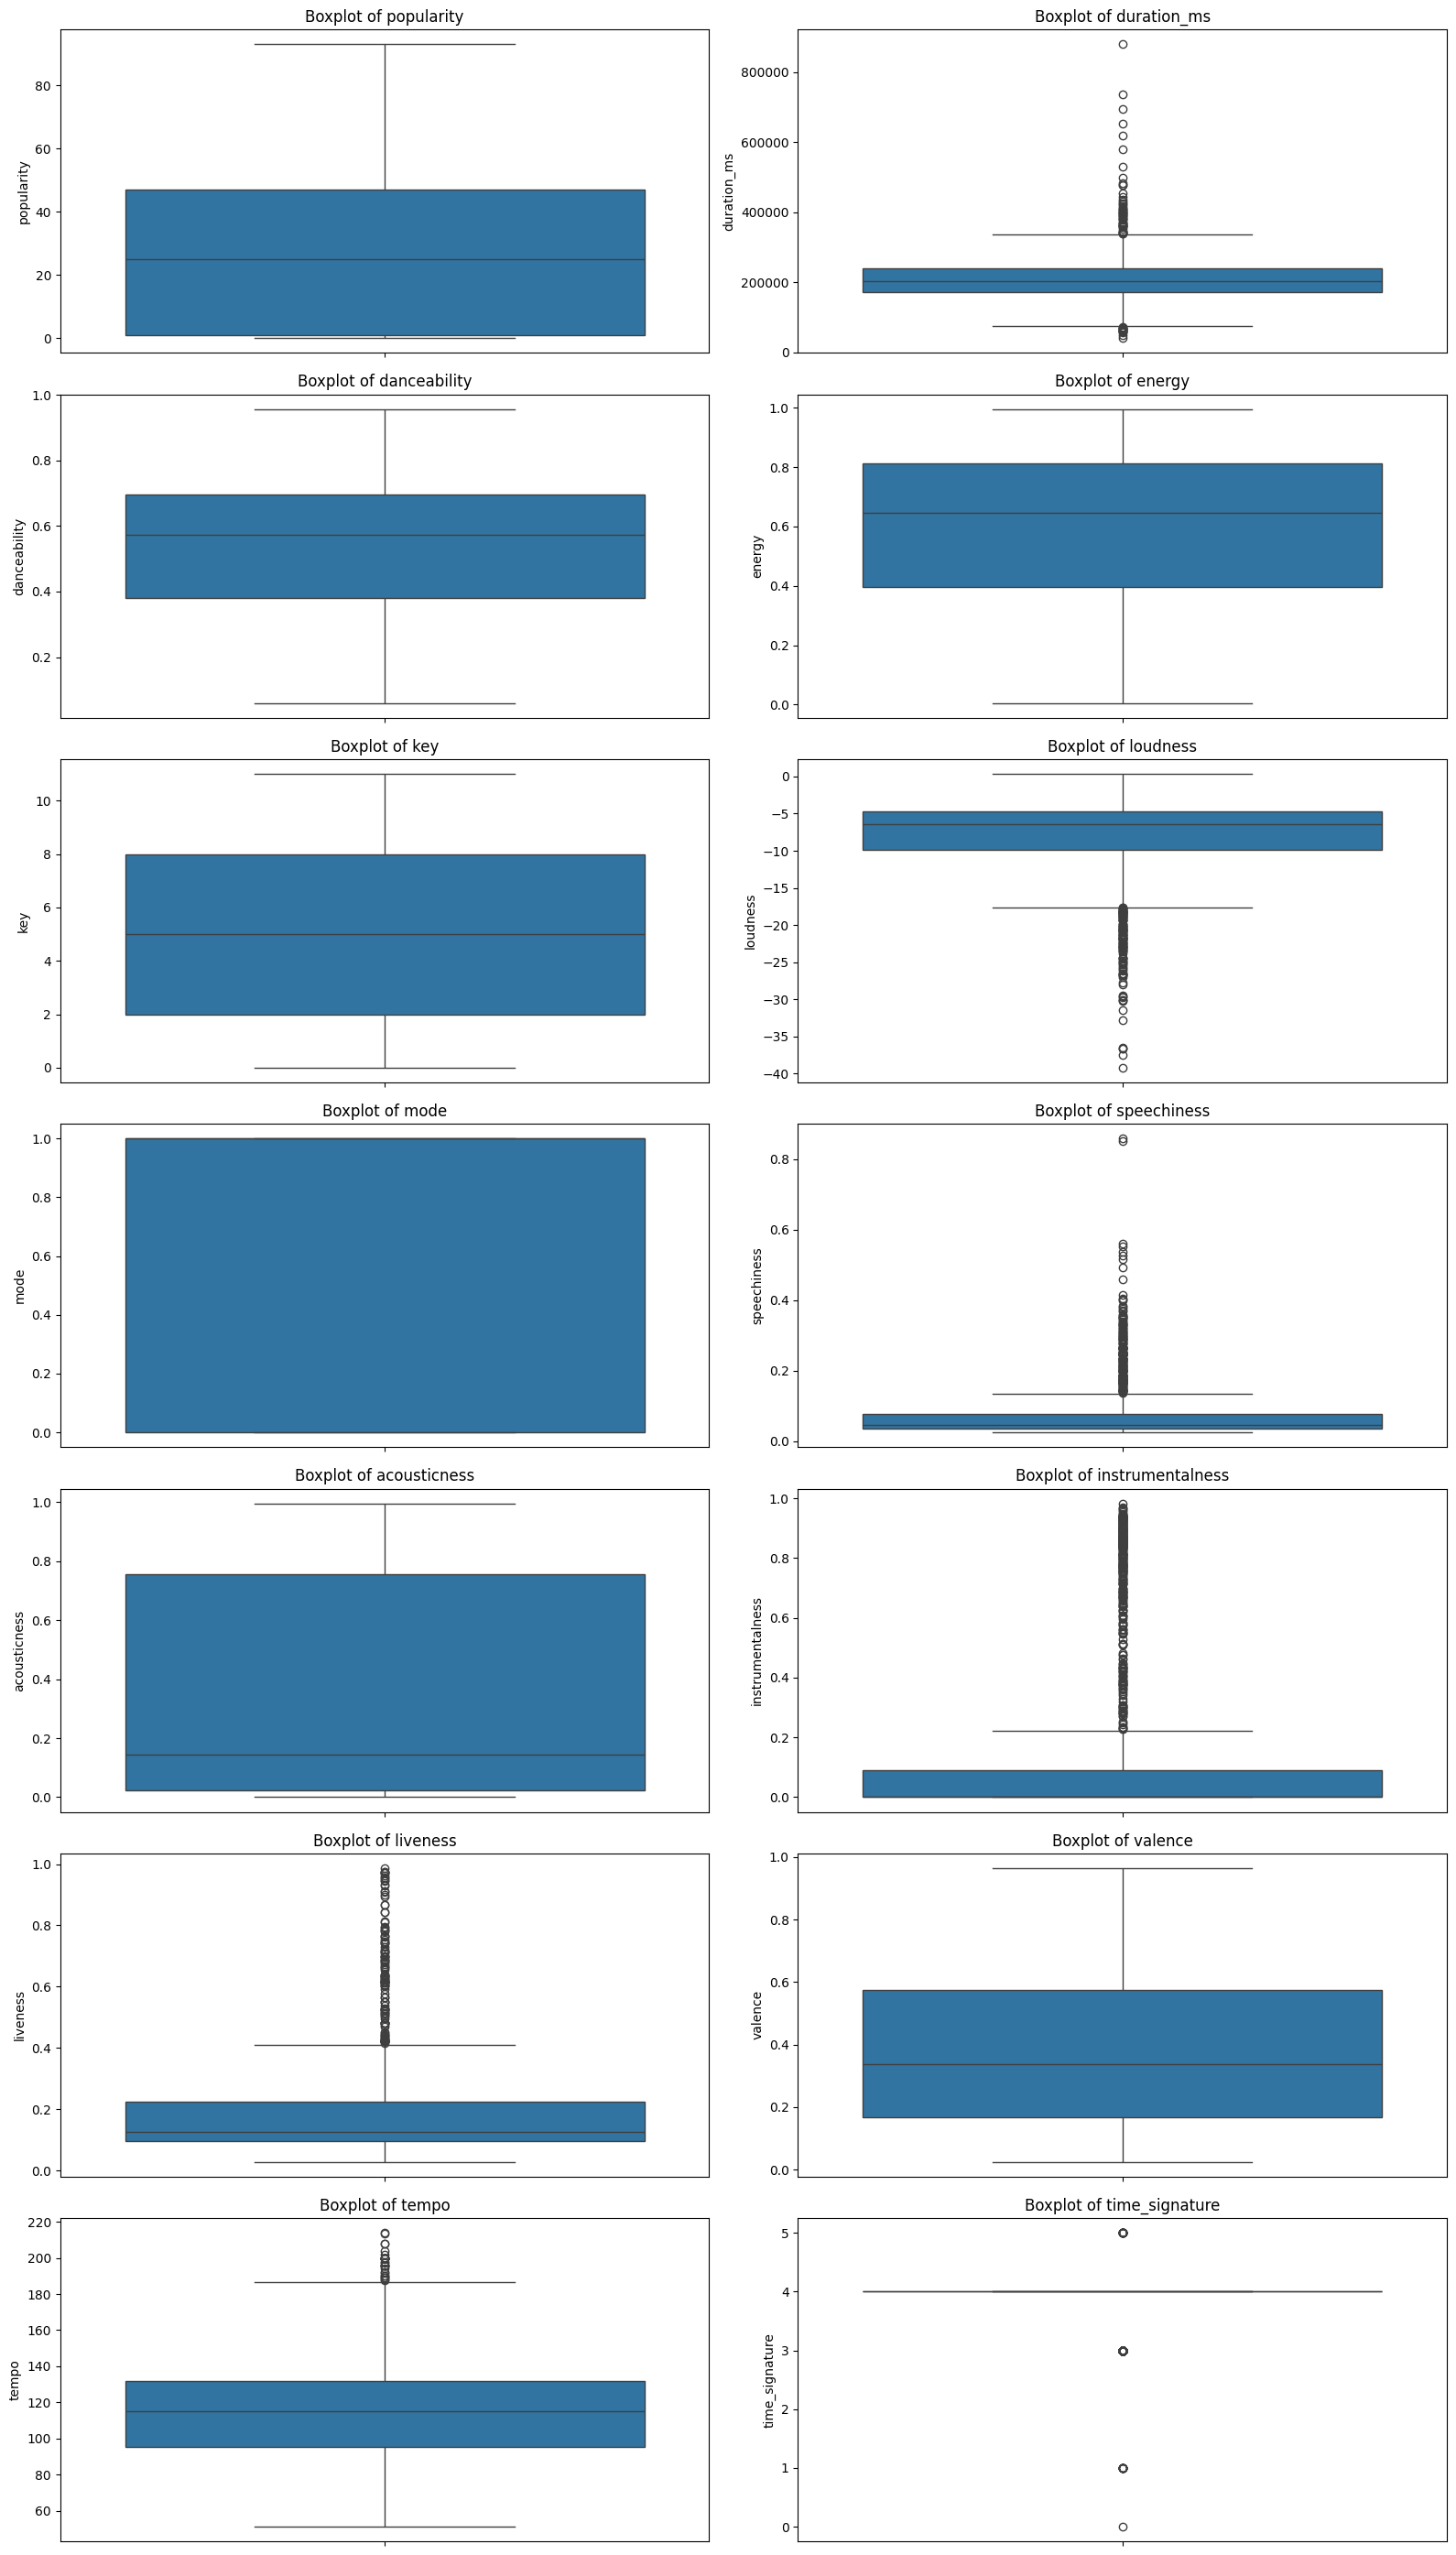

In [194]:
# Calculate the number of rows needed for 2 columns per row
num_features = len(features)
num_rows = math.ceil(num_features / 2)

# Create the figure with appropriate size
fig = plt.figure(figsize=(16, 4 * num_rows))

for i, feature in enumerate(features):
    ax = fig.add_subplot(num_rows, 2, i + 1)
    sns.boxplot(y=df[feature], ax=ax)
    ax.set_title(f"Boxplot of {feature}")
    ax.set_xlabel('')
    ax.set_ylabel(feature)
plt.tight_layout()
plt.show()

there are considerable outliers within the fields of `liveliness`,`tempo`, `duration`, `speechiness`,`instrumentalness`

In [195]:
df['track_genre'].value_counts()

track_genre
club     500
dance    500
opera    500
Name: count, dtype: int64

there is an equal distribution among the gengres within the dataset

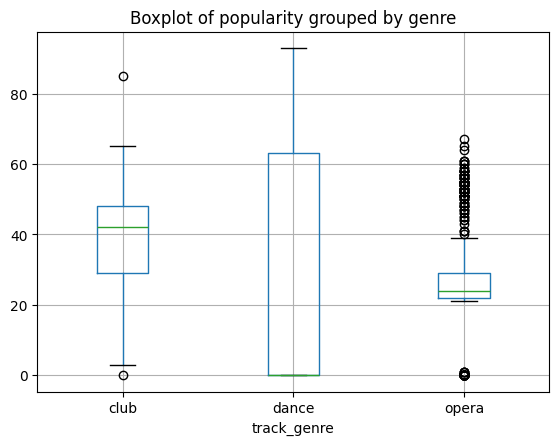

In [196]:
df.boxplot(column='popularity', by='track_genre')
plt.title('Boxplot of popularity grouped by genre')
plt.suptitle("")
plt.show()

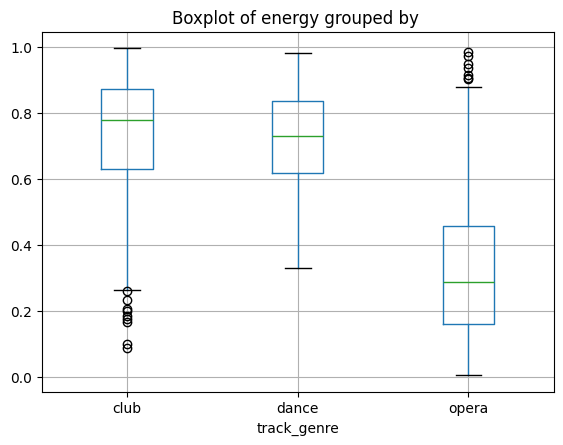

In [197]:
df.boxplot(column='energy', by='track_genre')
plt.title('Boxplot of energy grouped by ')
plt.suptitle("")
plt.show()

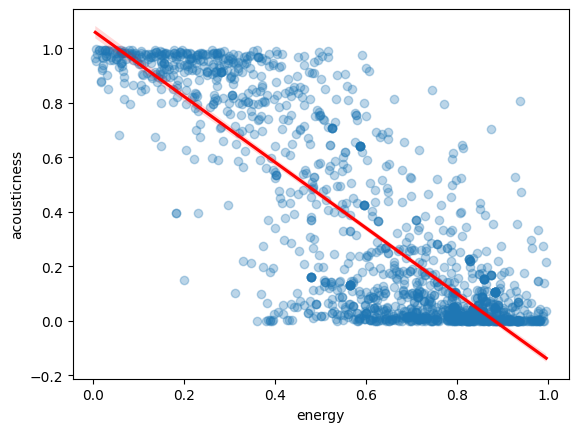

In [198]:
sns.regplot(data=df, x='energy', y='acousticness', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.show()

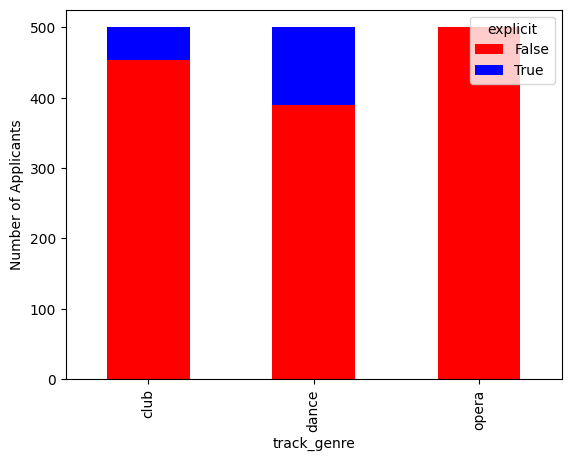

In [199]:
crosstab_CGL = pd.crosstab([ df['track_genre']], df['explicit'])
crosstab_CGL.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.ylabel('Number of Applicants')
plt.show()

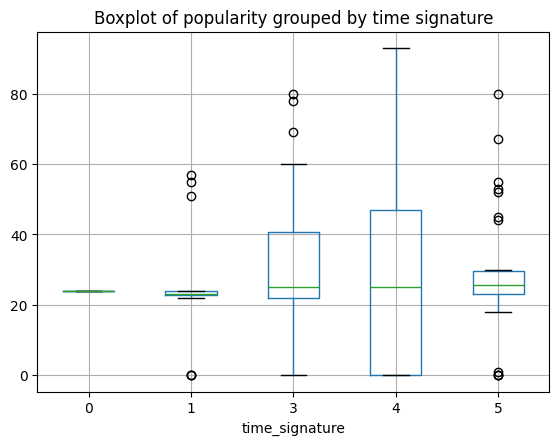

In [200]:
df.boxplot(column='popularity', by='time_signature')
plt.title('Boxplot of popularity grouped by time signature')
plt.suptitle("")
plt.show()

In [201]:
df['time_signature'].value_counts()

time_signature
4    1295
3     158
5      30
1      16
0       1
Name: count, dtype: int64

In [202]:
df['key'].value_counts()

key
2     204
1     195
5     136
0     132
8     132
7     128
9     121
11    114
6      94
4      89
10     86
3      69
Name: count, dtype: int64

In [203]:
df['mode'].value_counts()

mode
1    981
0    519
Name: count, dtype: int64

In [204]:
df.isna().sum()

popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [205]:
df.value_counts('track_genre')

track_genre
club     500
dance    500
opera    500
Name: count, dtype: int64

## Data preparation

Here we create two preprocess pipelines to suit the unique needs of task C (Clustering) and task D (Classification)
We create sub pipelines that allow us to apply different transformations to different types of data ensuring each columnn gets the most appropriate transformation. All of the features get a standard scaler to ensure they are on the same scale.

For clustering we drop the track_genre and add the popularaity column to the simple features sub pipeline. This ensures popularity is on the same scale as all the other features for the clustering anlaysis. We enitially leave popularity out of the sub pipeline because it will be target of the classification models later on and should not be processed in the classification pipeline as a result.

For the classification pipeline we drop popularity. This means we will have to ensure to create the "popularity_binary" column before running the classification pipeline. We also one hot encode track_genre as it is a categorical feature.

In [206]:
# Feature groups divided to allow different transformations 
skewed_feats      = ["duration_ms", "tempo", "liveness",
                     "instrumentalness", "speechiness", "acousticness"]
cube_feats        = ["loudness"]
simple_feats      = ["danceability", "energy", "valence"]
binary_feats      = ["explicit", "mode"]
time_sig_feats    = ["time_signature"]
key_feats         = ["key"]
categorical_feats = ["track_genre"]

# Sub-pipelines for feature groups 

# skewed features: log1p, and then standard scaler
skew_pipe = Pipeline([
    ("log1p" , FunctionTransformer(np.log1p, validate=False)),
    ("scale" , StandardScaler())

# Loudness is cube rooted because of its negative values and the standard scaled
])
cube_pipe = Pipeline([
    ("cuberoot", FunctionTransformer(np.cbrt, validate=False)),
    ("scale"   , StandardScaler())

# Simple features only use standard scaler
])
simple_pipe = Pipeline([
    ("scale" , StandardScaler())
])

# Keep binary features untouched
binary_passthrough = "passthrough"

#  normalize then standard scale time_signature
time_pipe = Pipeline([
    ("norm5" , FunctionTransformer(lambda x: x / 5.0, validate=False)),
    ("scale",  StandardScaler())
])

# → normalize then standard scale key
key_pipe = Pipeline([
    ("norm11", FunctionTransformer(lambda x: x / 11.0, validate=False)),
    ("scale" , StandardScaler())
])

# Clustering pipeline which also processes poplarity and drops genre
preprocessor_clust = ColumnTransformer(
    transformers=[
        ("skewed"      , skew_pipe          , skewed_feats),
        ("cube"        , cube_pipe          , cube_feats),
        ("simple"      , simple_pipe        , simple_feats + ["popularity"]),
        ("time_sig"    , time_pipe          , time_sig_feats),
        ("key_norm"    , key_pipe           , key_feats),
        ("binary"      , binary_passthrough , binary_feats),
        ("drop_genre"  , "drop"             , categorical_feats)
    ],
    remainder="drop",
    verbose_feature_names_out=True
)

# Classification pipeline one hot encodes genre and drops popularity
preprocessor_clf = ColumnTransformer(
    transformers=[
        ("skewed"          , skew_pipe          , skewed_feats),
        ("cube"            , cube_pipe          , cube_feats),
        ("simple"          , simple_pipe        , simple_feats),
        ("time_sig"        , time_pipe          , time_sig_feats),
        ("key_norm"        , key_pipe           , key_feats),
        ("genre_ohe"       , OneHotEncoder(handle_unknown="ignore"),
                                                  categorical_feats),
        ("binary"          , binary_passthrough , binary_feats),
        ("drop_popularity" , "drop"             , ["popularity"])
    ],
    remainder="drop",
    verbose_feature_names_out=True
)


The next two code cells create copys of the dataset and pass them through the clustering and classification pipelines. This lets us quickly see the processed data to ensure that it is all on the correct scale and there isnt anything we overlooked

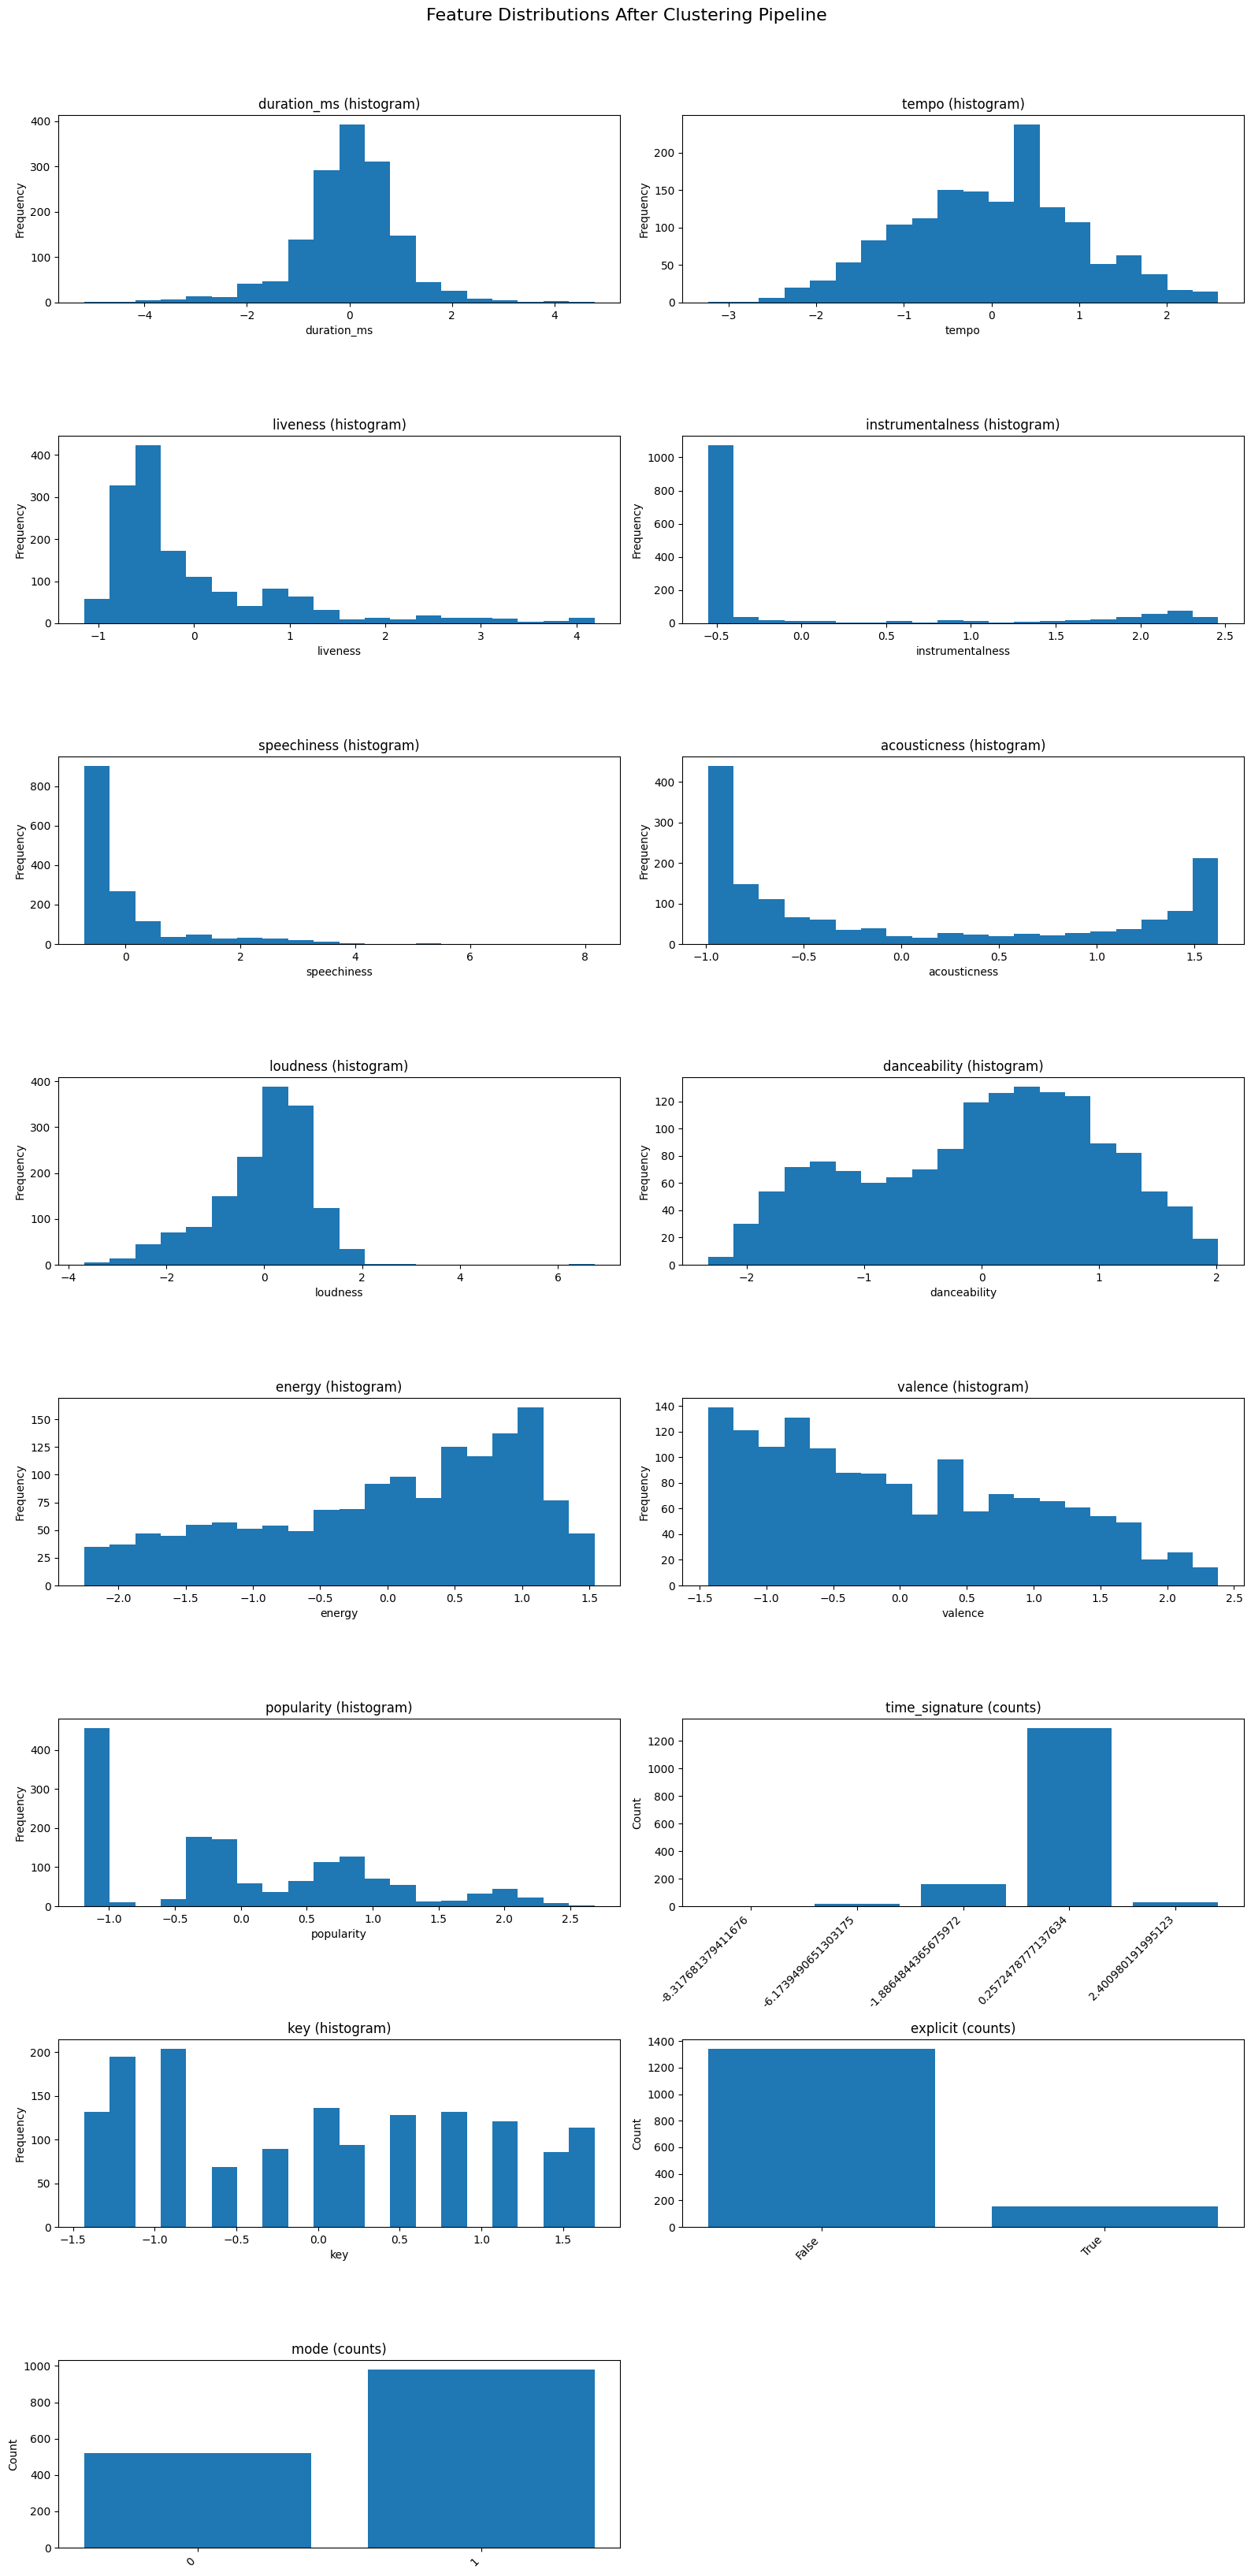

In [207]:
# Draws graph to visualize the data after the clustering pipeline is applied 
df_clust = df.copy()

X_clust = preprocessor_clust.fit_transform(df_clust)

features_clust = (
    skewed_feats
  + cube_feats
  + simple_feats + ["popularity"]
  + time_sig_feats
  + key_feats
  + binary_feats
)


df_clust = pd.DataFrame(X_clust, columns=features_clust)


n_feats = len(features_clust)
n_rows  = math.ceil(n_feats / 2)
fig, axes = plt.subplots(n_rows, 2, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for i, feat in enumerate(features_clust):
    ax  = axes[i]
    ser = df_clust[feat]

    if ser.nunique() <= 5:
        vc = ser.value_counts().sort_index()
        x  = np.arange(len(vc))
        ax.bar(x, vc.values)
        ax.set_xticks(x)
        ax.set_xticklabels(vc.index.astype(str), rotation=45, ha="right")
        ax.set_title(f"{feat} (counts)")
        ax.set_ylabel("Count")
    else:
        ax.hist(ser, bins=20)
        ax.set_title(f"{feat} (histogram)")
        ax.set_xlabel(feat)
        ax.set_ylabel("Frequency")


for ax in axes[n_feats:]:
    ax.axis("off")

fig.suptitle("Feature Distributions After Clustering Pipeline", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


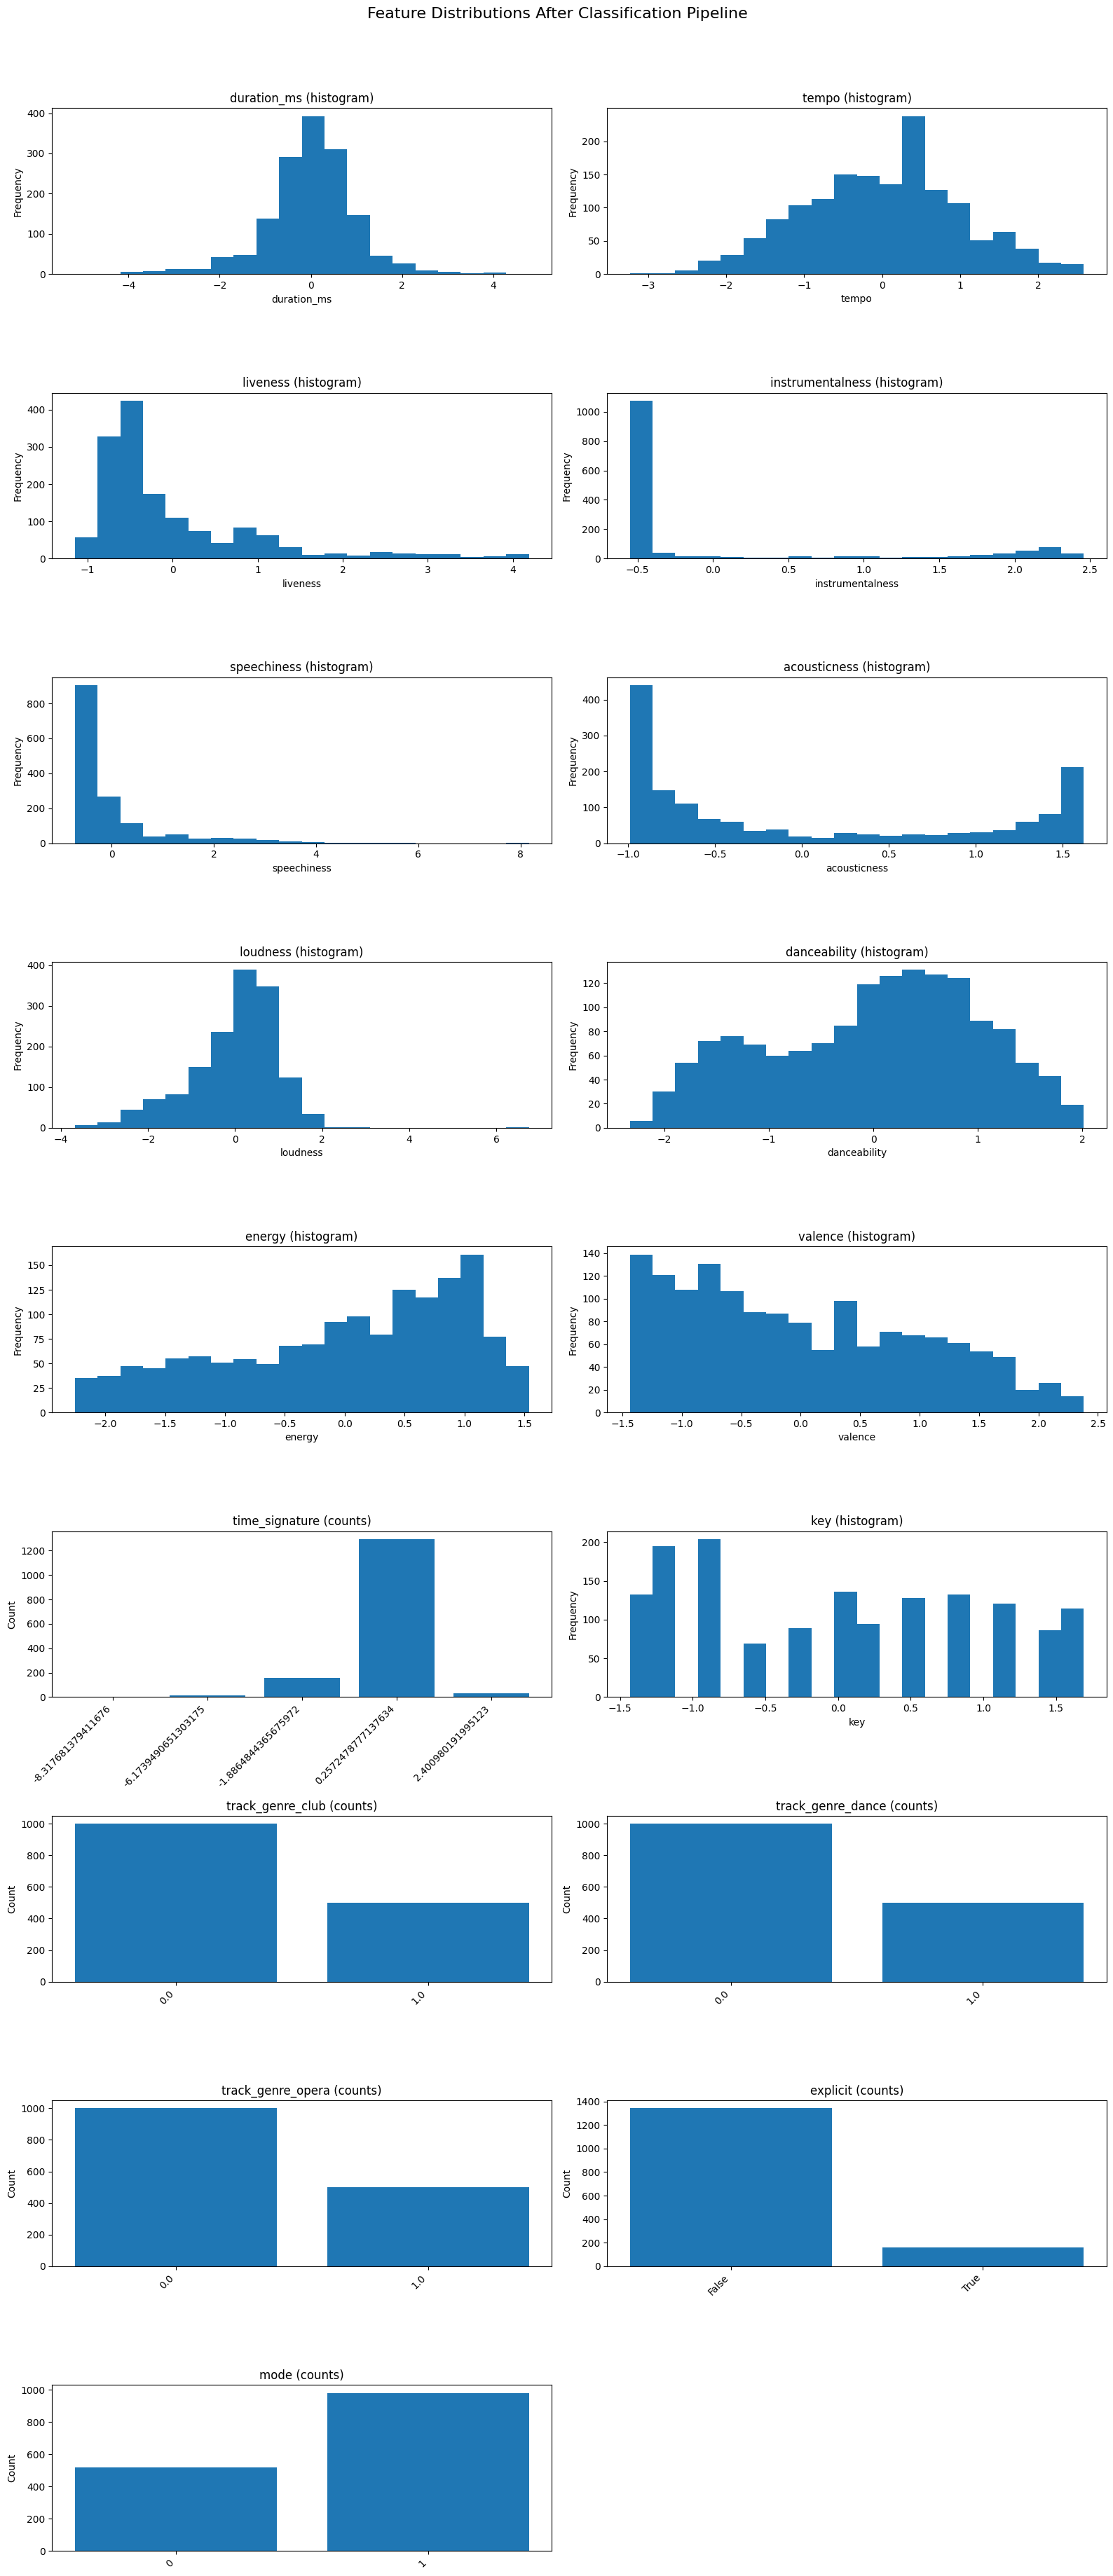

In [208]:
# Draws graph to visualize the data after the clustering pipeline is applied 
df_cls = df.copy()

X_clf = preprocessor_clf.fit_transform(df_cls)


ohe = preprocessor_clf.named_transformers_['genre_ohe']
ohe_names = list(ohe.get_feature_names_out(categorical_feats))


features_clf = (
    skewed_feats
  + cube_feats
  + simple_feats
  + time_sig_feats
  + key_feats
  + ohe_names
  + binary_feats
)


df_clf = pd.DataFrame(X_clf, columns=features_clf)


n_feats = len(features_clf)
n_rows  = math.ceil(n_feats / 2)
fig, axes = plt.subplots(n_rows, 2, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for i, feat in enumerate(features_clf):
    ax  = axes[i]
    ser = df_clf[feat]

    if ser.nunique() <= 5:
        vc = ser.value_counts().sort_index()
        x  = np.arange(len(vc))
        ax.bar(x, vc.values)
        ax.set_xticks(x)
        ax.set_xticklabels(vc.index.astype(str), rotation=45, ha="right")
        ax.set_title(f"{feat} (counts)")
        ax.set_ylabel("Count")
    else:
        ax.hist(ser, bins=20)
        ax.set_title(f"{feat} (histogram)")
        ax.set_xlabel(feat)
        ax.set_ylabel("Frequency")


for ax in axes[n_feats:]:
    ax.axis("off")

fig.suptitle("Feature Distributions After Classification Pipeline", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

## Clustering

In [209]:
# Scatterplot for clustered data
def clustering_scatterplot(points, labels, centers, title):
    n_clusters = np.unique(labels[labels != -1]).size  # Exclude noise (-1) from cluster count
    colors = np.array(["orange", "blue", "lime", "khaki", "pink", "green", "purple"])
    
    # Plot noise points if they exist
    if -1 in labels:
        plt.scatter(points[labels == -1, 0], 
                    points[labels == -1, 1], 
                    c="gray", 
                    label="Noise")
    
    # Plot clusters
    for i in range(n_clusters):
        plt.scatter(points[labels == i, 0], 
                    points[labels == i, 1], 
                    c=colors[i % colors.size], 
                    label=f"Cluster {i}")
    
    # Plot cluster centers if provided
    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], c="r", marker="*", s=500, label="Centers")
    
    plt.title(title)
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")

### K-Means Clustering

In [210]:
# Set the number of clusters
k = 3

# Build the KMeans pipeline
kmeans_pipe = Pipeline([
    ("preprocessor", preprocessor_clust),
    ("kmeans",      KMeans(n_clusters=k, random_state=42))
])

# Fit the pipeline to the original DataFrame
kmeans_pipe.fit(df)

# Create a new DataFrame with the cluster labels
df_with_clusters = df.assign(
    cluster = kmeans_pipe.named_steps["kmeans"].labels_
)

# Preprocess the data before clustering
X_proc = kmeans_pipe.named_steps["preprocessor"].transform(df)


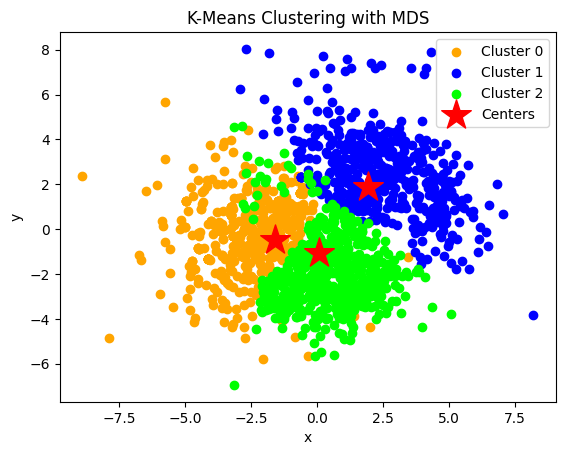

In [211]:
# Stack the original data and cluster centers for MDS projection
centers = kmeans_pipe.named_steps["kmeans"].cluster_centers_
data_and_centers = np.vstack([X_proc, centers])

# Perform MDS projection
mds_coordinates = manifold.MDS(n_components=2, random_state=42).fit_transform(data_and_centers)

# Plot the MDS projection
clustering_scatterplot(
    mds_coordinates[:-k],
    df_with_clusters["cluster"],
    mds_coordinates[-k:],
    "K-Means Clustering with MDS"
)

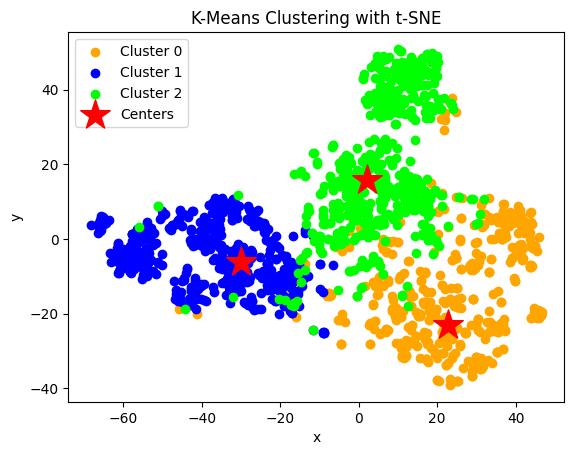

In [212]:
# Perform t-SNE projection
tsne_coordinates = manifold.TSNE(n_components=2, random_state=42).fit_transform(data_and_centers)

# Plot the t-SNE projection
clustering_scatterplot(
    tsne_coordinates[:-k],
    df_with_clusters["cluster"],
    tsne_coordinates[-k:],
    "K-Means Clustering with t-SNE"
)

In [213]:
df_with_clusters.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,cluster
0,85,202093,True,0.658,0.671,2,-12.210,1,0.0363,0.09330,0.000927,0.1150,0.166,100.966,4,club,2
1,49,215973,False,0.627,0.505,6,-12.659,1,0.0549,0.19700,0.014900,0.0583,0.146,100.005,4,club,2
2,65,188160,False,0.807,0.835,9,-6.849,0,0.0631,0.00148,0.527000,0.2330,0.349,124.979,4,club,2
3,59,233965,False,0.748,0.549,6,-5.447,0,0.0650,0.00268,0.792000,0.1960,0.197,101.033,4,club,2
4,55,187173,False,0.683,0.869,0,-4.828,1,0.0515,0.00088,0.836000,0.2060,0.219,123.983,4,club,2


In [214]:
df_with_clusters.tail()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,cluster
1495,23,352371,False,0.273,0.122,0,-22.173,0,0.0575,0.960,0.003330,0.0635,0.0731,117.718,4,opera,1
1496,22,204310,False,0.457,0.498,6,-8.387,1,0.0368,0.766,0.000002,0.2890,0.2020,116.255,4,opera,1
1497,23,225506,False,0.241,0.207,1,-16.353,1,0.0374,0.982,0.002260,0.1140,0.0735,86.885,1,opera,1
1498,23,148600,False,0.280,0.208,5,-20.158,1,0.0521,0.941,0.000200,0.4100,0.2410,90.477,4,opera,1
1499,23,257800,False,0.244,0.205,3,-15.596,1,0.0367,0.984,0.329000,0.0788,0.0750,71.370,4,opera,1


In [215]:
# Calculate the mean of each feature for each cluster
(df_with_clusters
   .select_dtypes(include="number")
   .drop(columns="cluster")
   .groupby(df_with_clusters["cluster"])
   .mean()
)

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
cluster,,,,,,,,,,,,,,
0,9.161793,189073.750487,0.677938,0.734940,5.364522,-5.502357,0.557505,0.127063,0.123199,0.022104,0.212682,0.552108,126.812805,3.994152
1,24.848018,226799.319383,0.304910,0.269047,4.852423,-14.328322,0.784141,0.043205,0.853971,0.204169,0.198391,0.200548,102.811465,3.645374
2,50.375235,215119.431520,0.610492,0.736203,4.896811,-5.891724,0.636023,0.058944,0.133190,0.273680,0.174663,0.363117,119.428463,3.969981


### K-Means Clustering Summary

- **Data processing** - The preprocessing was applied using the preprocesser_clust pipeline. The features were also scaled approproatley to ensure there was equal weighting. The popular features were also preserved for the clustering analysis.
- **Optimal clusters** - The elbow method was used to identify the optimal number of clusters. It was also determined that 3 clusters provided the best representation of the data.
- **Visualization techniques** - The clusters are centered and the boundaries were clearly displayed. MDS and t-SNE visualised high dimensional data in 2d.

- **Cluster Characteristics** - The k-means clustering revealed 3 different gorups of tracks. 
- **CLuster 0**: which tracked higher energy, danceability and loudness. Like upbeat popular songs.
- **Cluster 1**: whih were songs with moderate acoustic properties and somewhat average energy levels. Like mainstream pop. 
- **Cluster 2** are tracks with higher acousticness, lower energy and dancability, Like more instrumental songs.

- **Key Findings**: The clustering revealed that there were distinct groups of tracks which showed insights into the charateristics of some of the different styles.

- **Limitations**: The clustering results can be affected by the choice of features and preprocessing and the dataset may not fully reflect on all music genres.



### Elbow Method

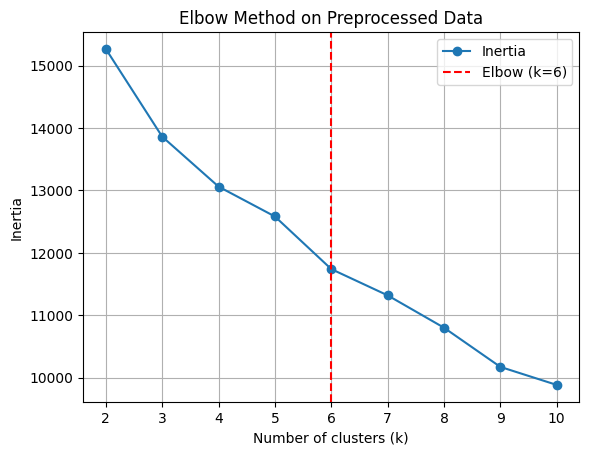

The optimal number of clusters (k) based on elbow point is: 6


In [216]:
# Preprocess the original df
X_proc = preprocessor_clust.fit_transform(df)

# Compute inertia for different values of k
inertia  = []
k_values = range(2, 11)
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42).fit(X_proc)
    inertia.append(km.inertia_)

# Locate the elbow point using the KneeLocator
knee = KneeLocator(
    k_values, inertia,
    curve="convex", direction="decreasing"
).knee

# Plot the elbow method results
plt.plot(k_values, inertia, "o-", label="Inertia")
plt.axvline(knee, color="red", linestyle="--", label=f"Elbow (k={knee})")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method on Preprocessed Data")
plt.legend()
plt.grid(True)
plt.show()

print(f"The optimal number of clusters (k) based on elbow point is: {knee}")

### Silhouette Analysis
Determine the optimal number of clusters using the Silhouette Method

For n_clusters = 2, average silhouette_score = 0.250


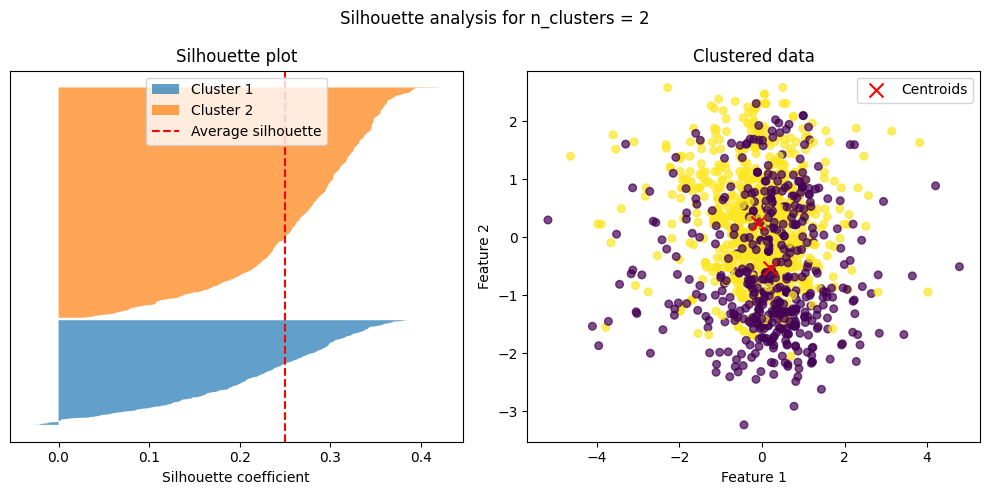

For n_clusters = 3, average silhouette_score = 0.157


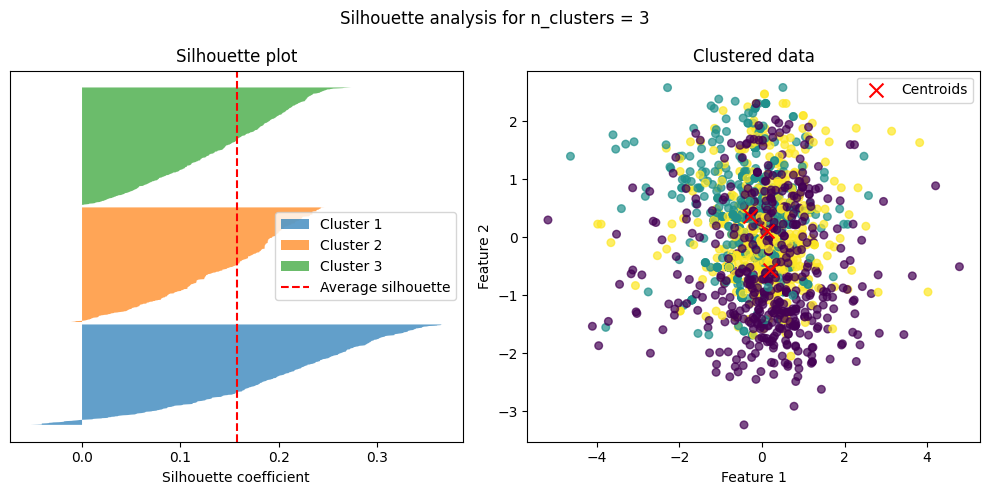

For n_clusters = 4, average silhouette_score = 0.143


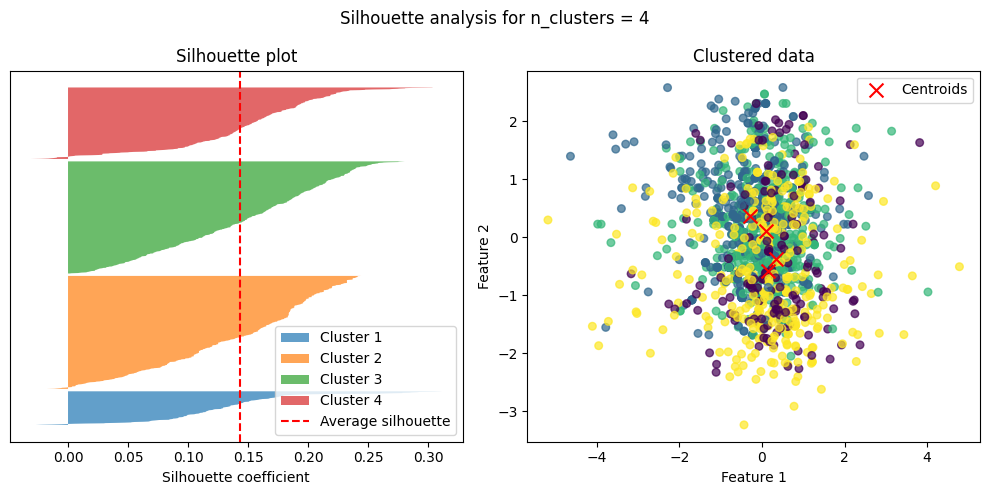

In [217]:
# Preprocess the original df
X_proc = preprocessor_clust.fit_transform(df)

# Min samples should be number of features + 1
min_samples = X_proc.shape[1] + 1

# Do Silhouette analysis for different values of k
for n_clusters in range(2, 5):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    # KMeans
    clusterer = cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_proc)
    silhouette_avg = metrics.silhouette_score(X_proc, cluster_labels)
    print(f"For n_clusters = {n_clusters}, average silhouette_score = {silhouette_avg:.3f}")

    # Silhouette samples
    sample_silhouette_values = metrics.silhouette_samples(X_proc, cluster_labels)

    # Silhouette plot
    y_lower = 10
    for i in range(n_clusters):
        ith_vals = sample_silhouette_values[cluster_labels == i]
        ith_vals.sort()
        size_i = ith_vals.shape[0]
        y_upper = y_lower + size_i
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0, ith_vals, alpha=0.7, label=f"Cluster {i+1}"
        )
        y_lower = y_upper + 10

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--", label="Average silhouette")
    ax1.set_title("Silhouette plot"); ax1.set_xlabel("Silhouette coefficient"); ax1.set_yticks([]); ax1.legend(loc="best")

    # Cluster scatterplot
    scatter = ax2.scatter(X_proc[:, 0], X_proc[:, 1], c=cluster_labels, s=30, alpha=0.7, cmap="viridis")
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], c="red", s=100, marker="x", label="Centroids")
    ax2.set_title("Clustered data"); ax2.set_xlabel("Feature 1"); ax2.set_ylabel("Feature 2"); ax2.legend(loc="best")

    plt.suptitle(f"Silhouette analysis for n_clusters = {n_clusters}")
    plt.tight_layout()
    plt.show()

### Comparison of Elbow & Silhouette
* The Elbow Method suggests k = 6, implying that the data requires a higher number of clusters to capture the data's nuances more effectively.
* The Silhouette Analysis suggests k = 2 (highest average silhouette score), implying that 2 well-separated clusters can capture the data without losing too much information.

### DBSCAN

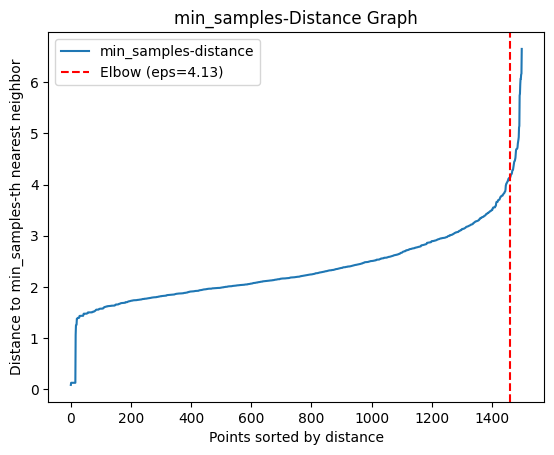

The optimal eps value is: 4.13


In [218]:
# Compute the epsilon for DBSCAN
# Compute the min_samples-nearest neighbors
min_samples = 16 # Number of dimensions + 1
neighbors_model = neighbors.NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors_model.fit(X_proc)
distances, indices = neighbors_fit.kneighbors(X_proc)

# Sort distances for visualization
distances = np.sort(distances[:, min_samples - 1], axis=0)

# Find the elbow point using KneeLocator
knee_locator = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
optimal_eps = distances[knee_locator.knee]

# Plot the k-distance graph with the elbow point
plt.plot(distances, label="min_samples-distance")
plt.axvline(x=knee_locator.knee, color="red", linestyle="--", label=f"Elbow (eps={optimal_eps:.2f})")
plt.title("min_samples-Distance Graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to min_samples-th nearest neighbor")
plt.legend()
plt.show()

print(f"The optimal eps value is: {optimal_eps:.2f}")

In [219]:
dbscan_pipe = Pipeline([
    ("preprocessor", preprocessor_clust),  # Preprocessing step
    ("dbscan", DBSCAN(eps=4.13, min_samples=16))  # DBSCAN clustering step
])

# Fit the pipeline the original DataFrame
dbscan_pipe.fit(df)

# Access the cluster labels from the DBSCAN model
labels = dbscan_pipe.named_steps["dbscan"].labels_

# Create a new DataFrame with the cluster labels
df_with_clusters = df.assign(cluster=labels)

# Get the DBSCAN model from the pipeline
db = dbscan_pipe.named_steps["dbscan"]

# Count the number of clusters and noise points
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise_ = list(db.labels_).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 20


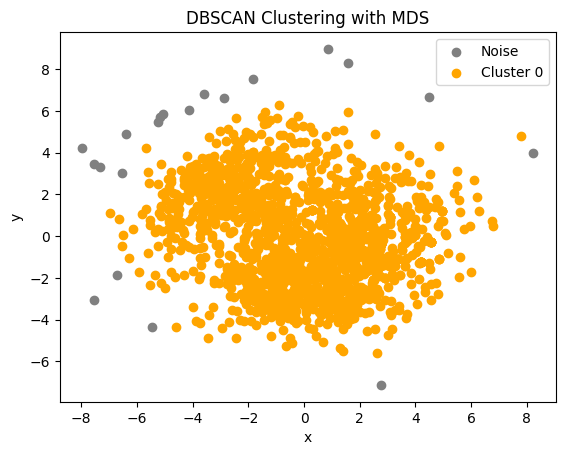

In [220]:
# Visualize Clusters with MDS
mds_coordinates = manifold.MDS(n_components=2).fit_transform(X_proc)
clustering_scatterplot(mds_coordinates, db.labels_, None, "DBSCAN Clustering with MDS")

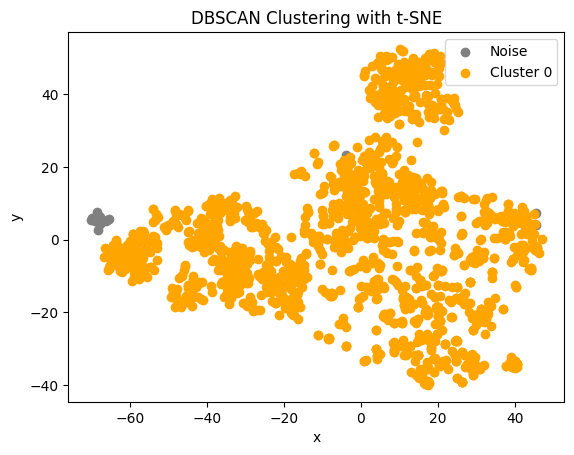

In [221]:
# Visualize Clusters with t-SNE
tsne_coordinates = manifold.TSNE(n_components=2).fit_transform(X_proc)
clustering_scatterplot(tsne_coordinates, db.labels_, None, "DBSCAN Clustering with t-SNE")

In [222]:
df_with_clusters.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,cluster
0,85,202093,True,0.658,0.671,2,-12.210,1,0.0363,0.09330,0.000927,0.1150,0.166,100.966,4,club,0
1,49,215973,False,0.627,0.505,6,-12.659,1,0.0549,0.19700,0.014900,0.0583,0.146,100.005,4,club,0
2,65,188160,False,0.807,0.835,9,-6.849,0,0.0631,0.00148,0.527000,0.2330,0.349,124.979,4,club,0
3,59,233965,False,0.748,0.549,6,-5.447,0,0.0650,0.00268,0.792000,0.1960,0.197,101.033,4,club,0
4,55,187173,False,0.683,0.869,0,-4.828,1,0.0515,0.00088,0.836000,0.2060,0.219,123.983,4,club,0


In [223]:
df_with_clusters.tail()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,cluster
1495,23,352371,False,0.273,0.122,0,-22.173,0,0.0575,0.960,0.003330,0.0635,0.0731,117.718,4,opera,0
1496,22,204310,False,0.457,0.498,6,-8.387,1,0.0368,0.766,0.000002,0.2890,0.2020,116.255,4,opera,0
1497,23,225506,False,0.241,0.207,1,-16.353,1,0.0374,0.982,0.002260,0.1140,0.0735,86.885,1,opera,-1
1498,23,148600,False,0.280,0.208,5,-20.158,1,0.0521,0.941,0.000200,0.4100,0.2410,90.477,4,opera,0
1499,23,257800,False,0.244,0.205,3,-15.596,1,0.0367,0.984,0.329000,0.0788,0.0750,71.370,4,opera,0


In [224]:
# Calculate the mean of each feature for each cluster
(df_with_clusters
   .select_dtypes(include="number")
   .drop(columns="cluster")
   .groupby(df_with_clusters["cluster"])
   .mean()
)

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
cluster,,,,,,,,,,,,,,
-1,25.950000,210055.000000,0.311700,0.324024,5.850000,-14.464500,0.700000,0.119005,0.753330,0.181541,0.226700,0.196115,113.032650,1.450000
0,28.589189,209742.758108,0.544168,0.598032,5.032432,-8.228896,0.653378,0.076916,0.342451,0.166400,0.194417,0.381013,116.977089,3.912838


## Classification

In [225]:
# ─── Cell 1: Create binary target (leave `popularity` in df for the preprocessor to drop) ───
m = df['popularity'].median()
df['popularity_binary'] = (df['popularity'] > m).astype(int)
# DO NOT drop `popularity` here — `preprocessor_clf` will handle that.


In [226]:
# ─── Cell 2: Train/test split ───────────────────────────────────────────────────────────
from sklearn.model_selection import train_test_split

X = df.drop('popularity_binary', axis=1)
y = df['popularity_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=True,
    stratify=y,
    random_state=42
)


In [227]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import set_config

# 1) Pipeline
pipe_svm = Pipeline([
    ('preproc', preprocessor_clf),
    ('svm',    SVC(probability=True, random_state=42))
])

set_config(display="diagram")
pipe_svm



Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('skewed',
                                                  Pipeline(steps=[('log1p',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['duration_ms', 'tempo',
                                                   'liveness',
                                                   'instrumentalness',
                                                   'speechiness',
                                                   'acousticness']),
                                                 ('cube',
                                                  Pipeline(steps=[('cuberoot',
                                                                   FunctionTransformer(func=<ufunc 'cbrt'>)),
                                                                  ('scale',
                                                                   StandardScaler(...
                                                  ['time_signature']),
                                                 ('key_norm',
                                                  Pipeline(steps=[('norm11',
                                                                   FunctionTransformer(func=<function <lambda> at 0x000001CA03207E20>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['key']),
                                                 ('genre_ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['track_genre']),
                                                 ('binary', 'passthrough',
                                                  ['explicit', 'mode']),
                                                 ('drop_popularity', 'drop',
                                                  ['popularity'])])),
                ('svm', SVC(probability=True, random_state=42))])

In [228]:
# ─── Cell 4: GridSearch for SVM ────────────────────────────────────────────────────────
param_grid_svm = {
    'svm__C':     [0.1, 1, 10, 100],  
    'svm__gamma': [1, 0.1, 0.01, 0.001], 
    'svm__kernel':[ 'rbf', 'linear', 'poly']
}

search_svm = GridSearchCV(
    pipe_svm,
    param_grid=param_grid_svm,
    cv=3,
    n_jobs=-1,
    refit=True
)
search_svm.fit(X_train, y_train)

print("Best SVM CV score   =", search_svm.best_score_)
print("Best SVM parameters =", search_svm.best_params_)

SVM_best_model  = search_svm.best_estimator_
SVM_best_params = search_svm.best_params_


Best SVM CV score   = 0.7333333333333334
Best SVM parameters = {'svm__C': 1, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}


In [229]:
# ─── Cell 5: Random Forest pipeline + hyperparameter search ───────────────────────────
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

pipe_rf = Pipeline([
    ('preproc', preprocessor_clf),
    ('rf',      RandomForestClassifier(random_state=42))
])

set_config(display="diagram")
pipe_rf


Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('skewed',
                                                  Pipeline(steps=[('log1p',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['duration_ms', 'tempo',
                                                   'liveness',
                                                   'instrumentalness',
                                                   'speechiness',
                                                   'acousticness']),
                                                 ('cube',
                                                  Pipeline(steps=[('cuberoot',
                                                                   FunctionTransformer(func=<ufunc 'cbrt'>)),
                                                                  ('scale',
                                                                   StandardScaler(...
                                                  ['time_signature']),
                                                 ('key_norm',
                                                  Pipeline(steps=[('norm11',
                                                                   FunctionTransformer(func=<function <lambda> at 0x000001CA03207E20>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['key']),
                                                 ('genre_ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['track_genre']),
                                                 ('binary', 'passthrough',
                                                  ['explicit', 'mode']),
                                                 ('drop_popularity', 'drop',
                                                  ['popularity'])])),
                ('rf', RandomForestClassifier(random_state=42))])

In [230]:
# ─── Cell 6: RandomizedSearch for RF ─────────────────────────────────────────────────
param_dist_rf = {
    'rf__n_estimators':    [50, 100, 150, 200],
    'rf__max_depth':       [10, 20, None],
    'rf__min_samples_split':[2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features':    ['sqrt', 'log2'],
    'rf__bootstrap':       [True, False]
}

search_rf = RandomizedSearchCV(
    pipe_rf,
    param_distributions=param_dist_rf,
    n_iter=100,
    cv=3,
    n_jobs=-1,
    refit=True,
    random_state=42
)
search_rf.fit(X_train, y_train)

print("Best RF CV score   =", search_rf.best_score_)
print("Best RF parameters =", search_rf.best_params_)

RF_best_model  = search_rf.best_estimator_
RF_best_params = search_rf.best_params_


Best RF CV score   = 0.7625000000000001
Best RF parameters = {'rf__n_estimators': 150, 'rf__min_samples_split': 10, 'rf__min_samples_leaf': 1, 'rf__max_features': 'log2', 'rf__max_depth': 20, 'rf__bootstrap': False}


In [231]:
# 1) Build pipeline: preprocessing → HistGradientBoosting
pipe_gb = Pipeline([
    ('preproc', preprocessor_clf),
    ('gb',     HistGradientBoostingClassifier(random_state=42))
])

# Visualize pipeline structure
set_config(display="diagram")
pipe_gb


Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('skewed',
                                                  Pipeline(steps=[('log1p',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['duration_ms', 'tempo',
                                                   'liveness',
                                                   'instrumentalness',
                                                   'speechiness',
                                                   'acousticness']),
                                                 ('cube',
                                                  Pipeline(steps=[('cuberoot',
                                                                   FunctionTransformer(func=<ufunc 'cbrt'>)),
                                                                  ('scale',
                                                                   StandardScaler(...
                                                 ('key_norm',
                                                  Pipeline(steps=[('norm11',
                                                                   FunctionTransformer(func=<function <lambda> at 0x000001CA03207E20>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['key']),
                                                 ('genre_ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['track_genre']),
                                                 ('binary', 'passthrough',
                                                  ['explicit', 'mode']),
                                                 ('drop_popularity', 'drop',
                                                  ['popularity'])])),
                ('gb', HistGradientBoostingClassifier(random_state=42))])

In [232]:
# ─── Cell 8: RandomizedSearch for GB ──────────────────────────────────────────────────
param_dist_gb = {
    'gb__learning_rate':   [0.01, 0.1, 0.2],
    'gb__max_iter':        [100, 200, 300],
    'gb__max_depth':       [3, 5, 7],
    'gb__min_samples_leaf':[10, 20, 40]
}

search_gb = RandomizedSearchCV(
    pipe_gb,
    param_distributions=param_dist_gb,
    n_iter=50,
    cv=3,
    n_jobs=-1,
    refit=True,
    random_state=42,
    verbose=2
)
search_gb.fit(X_train, y_train)

print("Best GB CV score   =", search_gb.best_score_)
print("Best GB parameters =", search_gb.best_params_)

GB_best_model  = search_gb.best_estimator_
GB_best_params = search_gb.best_params_


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best GB CV score   = 0.75
Best GB parameters = {'gb__min_samples_leaf': 40, 'gb__max_iter': 100, 'gb__max_depth': 7, 'gb__learning_rate': 0.1}


## Support Vector Machine (SVM)

### Hyperparameters

- **C**: Regularization strength, controlling the tolerance for misclassification.  
  - Small values of C allow for a wider margin, which can lead to underfitting.  
  - Large values narrow the margin, potentially causing overfitting.  
  - Tested values: 0.1, 1, 10, and 100. The best value was **1**.  

- **gamma**: Defines the influence of a single training example.  
  - Large gamma values focus tightly, which may result in overfitting.  
  - Small gamma values provide a smoother influence, reducing overfitting.  
  - Tested values: 1, 0.1, 0.01, and 0.001. The best value was **0.1**.  

- **kernel**: Specifies the shape of the decision boundary.  
  - Tested options: linear, polynomial, and RBF (radial basis function).  
  - The RBF kernel performed best due to the data's complexity.  

- **Cross-validation (CV)**:  
  - Data was split into three parts, training on two parts and testing on one.  
  - This was repeated three times, rotating the validation set.  
  - Testing with a CV of 5 produced similar results.  

### Results

The final CV score for SVM was **0.7333 repeating**.

---

## Random Forest (RF)

### Hyperparameters

- **n_estimators**: Number of trees in the forest.  
  - Tested values: 50, 100, 150, and 200.  
  - The best value was **100**, balancing prediction stability and training time.  

- **max_depth**: Maximum depth of each tree, controlling complexity.  
  - A depth of **20** was optimal, capturing sufficient detail without overfitting.  

- **min_samples_split**: Minimum samples required to split a node.  
  - A value of **2** allowed the model to capture finer details effectively.  

- **min_samples_leaf**: Minimum samples required at a leaf node.  
  - The best value was **1**, ensuring leaves had at least one sample.  

- **max_features**: Number of features considered at each split.  
  - A value of `log2` enhanced generalization by introducing diversity.  

- **bootstrap**: Whether bootstrapping (resampling with replacement) was used.  
  - Training on the full dataset per tree yielded better results.  

- **n_jobs**: Set to **-1**, using all CPU cores to accelerate training.  

- **Cross-validation (CV)**:  
  - Similar to SVM, data was split into three parts for training and testing.  
  - Testing with a CV of 5 yielded comparable results.  

### Results

The final CV score for Random Forest was **0.76**, an improvement over earlier runs where the highest score was **0.729**.

---

## HistGradientBoosting

### Hyperparameters

- **learning_rate**: Controls how quickly the model adapts during training.  
  - A value of **0.1** balanced learning speed and overfitting.  

- **max_iter**: Number of boosting rounds.  
  - A value of **100** was sufficient due to the learning rate being 0.1.  

- **max_depth**: Maximum depth of trees, controlling complexity.  
  - A value of **7** captured more intricate patterns effectively.  

- **min_samples_leaf**: Minimum samples required per leaf node.  
  - A value of **40** encouraged generalization and avoided overfitting.  

- **Cross-validation (CV)**:  
  - CV was set to 3, similar to other models, with additional testing at 5 folds.  

### Results

The final CV score for HistGradientBoosting was **0.75**, making it the second-best performing model.


# Model evaluation
Here we graph model results based on accuracy, precision, recall, F1 score and MAE.
+ SVM is the best performing model in every metric, with a 73.67% accuracy and the best precision at 74.35% and F1 score at 73.29%. It also had the lowest MAE at 0.2633, indicating fewer prediction errors. SVM outperformed Random Forest and Gradient Boosting, making it the best overall model for this task.

+ Gradient boosting is the worst performing with an accuracy of 69%. This model performed the worst in all areas which indicates the model struggled to identify patterns in the data like SVM did.

+ Random forest achieves an accuracy of 71%, so there is still some incorrect predictions, but this could be due to some tracks having very similar values. Overall SVM outperformed it, although random forest had the highest CV score.





Model: Random Forest
  Accuracy : 0.7067
  Precision: 0.7072
  Recall   : 0.7067
  F1 Score : 0.7068
  MAE      : 0.2933

Model: Gradient Boosting
  Accuracy : 0.7133
  Precision: 0.7131
  Recall   : 0.7133
  F1 Score : 0.7131
  MAE      : 0.2867

Model: SVM
  Accuracy : 0.7367
  Precision: 0.7435
  Recall   : 0.7367
  F1 Score : 0.7329
  MAE      : 0.2633


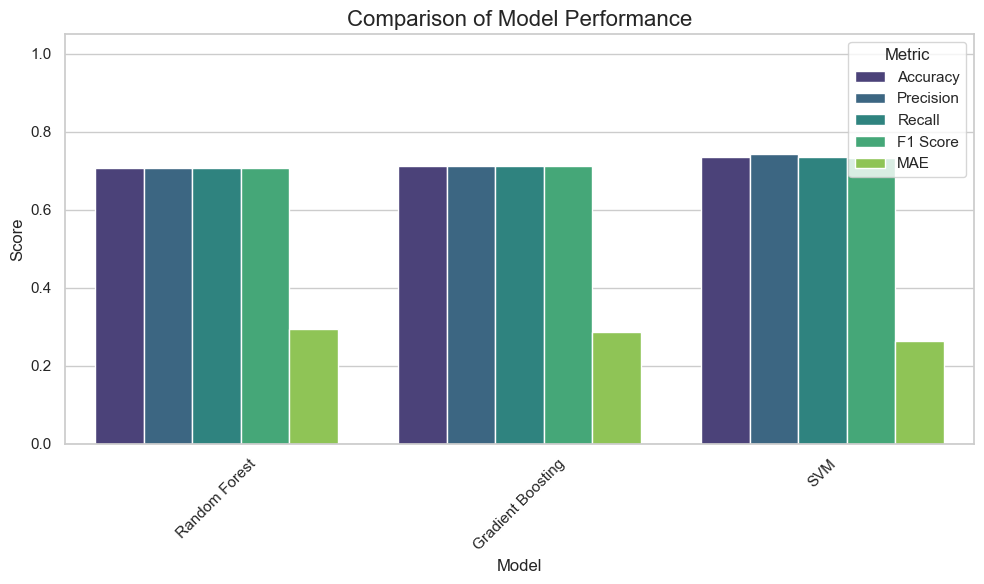

In [233]:
rf_preds = RF_best_model.predict(X_test)
GB_preds = GB_best_model.predict(X_test)
svm_preds = SVM_best_model.predict(X_test)

# Collect all model predictions
models_predictions = {
    "Random Forest": rf_preds,
    "Gradient Boosting": GB_preds,
    "SVM": svm_preds
}

# Initialisees the results dictionary
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "MAE": []
}

# Calculate metrics for each model
for model_name, preds in models_predictions.items():
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted')
    rec = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')
    mae = mean_absolute_error(y_test, preds)

    results["Model"].append(model_name)
    results["Accuracy"].append(acc)
    results["Precision"].append(prec)
    results["Recall"].append(rec)
    results["F1 Score"].append(f1)
    results["MAE"].append(mae)
    
    print(f"\nModel: {model_name}")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall   : {rec:.4f}")
    print(f"  F1 Score : {f1:.4f}")
    print(f"  MAE      : {mae:.4f}")

results_df = pd.DataFrame(results)

# Melt the DataFrame for easier plotting
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

#Creating bar charts to for each metric in each model.
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(data=results_melted, x="Model", y="Score", hue="Metric", palette="viridis")

plt.title("Comparison of Model Performance", fontsize=16)
plt.ylim(0, 1.05)
plt.legend(title="Metric")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Dimension Reduction 


SVM was our best performing model as such we now investiagte if dimension reduction techniques can improve performance even more 


In [ ]:
# Number of original features 
n_features = X_train.shape[1]
component_options = [2, 5, 10, min(n_features, 20)]

# Build the Dimension Reduction + SVM pipeline
pipe_svm_dr = Pipeline([
    ('preproc',    preprocessor_clf),
    ('reduce_dim', 'passthrough'),
    ('svm',        SVC(
                       C=SVM_best_params['svm__C'],
                       gamma=SVM_best_params['svm__gamma'],
                       kernel=SVM_best_params['svm__kernel'],
                       probability=True,
                       random_state=42
                   ))
])

# DR methods grid
param_grid_dr = [
    {
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': component_options
    },
    {
        'reduce_dim': [FastICA(random_state=42, max_iter=1000, tol=1e-4)],
        'reduce_dim__n_components': component_options
    },
    {
        'reduce_dim': [LocallyLinearEmbedding(n_neighbors=10)],
        'reduce_dim__n_components': component_options
    }
]

# Run GridSearchCV
search_svm_dr = GridSearchCV(
    pipe_svm_dr,
    param_grid=param_grid_dr,
    cv=5,
    n_jobs=-1,
    refit=True,
    error_score='raise'
)
search_svm_dr.fit(X_train, y_train)

print(f"Best DR+SVM CV score = {search_svm_dr.best_score_:.4f}")
print("Best DR+SVM params   =", search_svm_dr.best_params_)

# Save the best model 
SVM_DR_best_model = search_svm_dr.best_estimator_


In [ ]:
#  Compare Baseline SVM vs. Dimesion Reduction +SVM 


# Predictions
svm_preds    = SVM_best_model.predict(X_test)
svm_dr_preds = SVM_DR_best_model.predict(X_test)

models_predictions = {
    "SVM":      svm_preds,
    "SVM + DR": svm_dr_preds
}

# Compute metrics
results = {
    "Model":     [],
    "Accuracy":  [],
    "Precision": [],
    "Recall":    [],
    "F1 Score":  [],
    "MAE":       []
}

for name, preds in models_predictions.items():
    acc  = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted')
    rec  = recall_score(y_test, preds, average='weighted')
    f1   = f1_score(y_test, preds, average='weighted')
    mae  = mean_absolute_error(y_test, preds)
    
    results["Model"].append(name)
    results["Accuracy"].append(acc)
    results["Precision"].append(prec)
    results["Recall"].append(rec)
    results["F1 Score"].append(f1)
    results["MAE"].append(mae)
    
    # Print numeric results for each model
    print(f"\n{name} metrics:")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall   : {rec:.4f}")
    print(f"  F1 Score : {f1:.4f}")
    print(f"  MAE      : {mae:.4f}")

# Build DataFrame for plotting
results_df     = pd.DataFrame(results)
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

print("\nSummary table:")
print(results_df.to_string(index=False, float_format='%.4f'))

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(
    data=results_melted,
    x="Model",
    y="Score",
    hue="Metric",
    palette="viridis"
)
plt.title("SVM vs. SVM + DR Performance Comparison", fontsize=14)
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Here we see that the dimension reduction techniques provided modest improvements in all performance metrics 
Finally we compare all 4 of our models for an easy overview of their performances 

In [ ]:
# Final Comparison of All Models
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score,
    mean_absolute_error
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions for each model
rf_preds      = RF_best_model.predict(X_test)
gb_preds      = GB_best_model.predict(X_test)
svm_preds     = SVM_best_model.predict(X_test)
svm_dr_preds  = SVM_DR_best_model.predict(X_test)

models_predictions = {
    "Random Forest":     rf_preds,
    "Gradient Boosting": gb_preds,
    "SVM":               svm_preds,
    "SVM + DR":          svm_dr_preds
}

# Compute metrics and print them
results = {
    "Model":     [],
    "Accuracy":  [],
    "Precision": [],
    "Recall":    [],
    "F1 Score":  [],
    "MAE":       []
}

for name, preds in models_predictions.items():
    acc  = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted')
    rec  = recall_score(y_test, preds, average='weighted')
    f1   = f1_score(y_test, preds, average='weighted')
    mae  = mean_absolute_error(y_test, preds)
    
    results["Model"].append(name)
    results["Accuracy"].append(acc)
    results["Precision"].append(prec)
    results["Recall"].append(rec)
    results["F1 Score"].append(f1)
    results["MAE"].append(mae)
    
    print(f"\n{name} metrics:")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall   : {rec:.4f}")
    print(f"  F1 Score : {f1:.4f}")
    print(f"  MAE      : {mae:.4f}")


results_df     = pd.DataFrame(results)
results_melted = results_df.melt(
    id_vars="Model",
    var_name="Metric",
    value_name="Score"
)


print("\nSummary table:")
print(results_df.to_string(index=False, float_format='%.4f'))

# Plot comparison bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(
    data=results_melted,
    x="Model",
    y="Score",
    hue="Metric",
    palette="viridis"
)
plt.title("Comparison of Model Performance", fontsize=16)
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()